#### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

#### IMPORTAÇÃO DOS DADOS

In [2]:
Dados_S7 = pd.read_csv("C:\\JupyterLab\\PROJETO FINAL - HIDROGÊNIO VERDE\\DLS\\SiO2_NP_S7.txt", sep = '\t', engine='python', header=1)

In [3]:
silica = pd.read_csv('C:\\JupyterLab\\PROJETO FINAL - HIDROGÊNIO VERDE\\MEV\Silica.txt', sep = '\s+', engine='python')

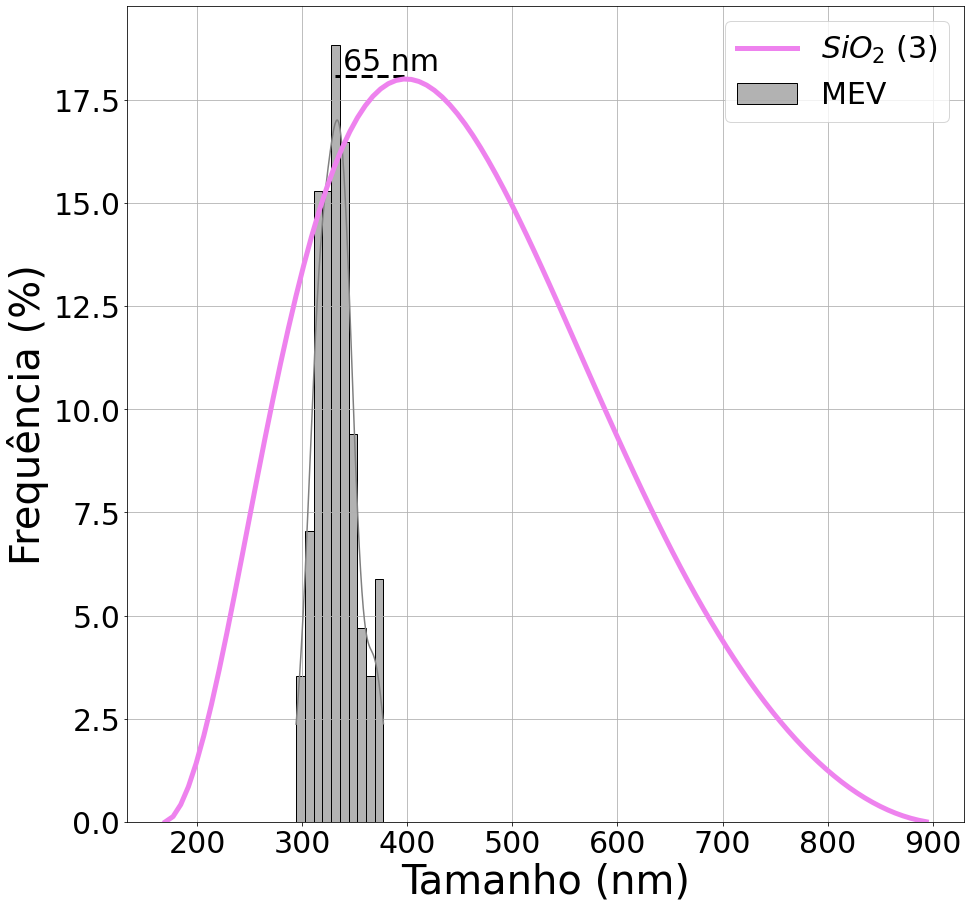

Média: 1.4492746376811594
Desvio padrão: 4.176390291117535
Mínimo: 0.0
Máximo: 17.83


In [4]:
# Suavização dos dados
x = Dados_S7.iloc[41:53, 4]
y = Dados_S7.iloc[41:53, 5]

# Criação de um spline para suavização
x_smooth = np.linspace(x.min(), x.max(), 100)
spline = make_interp_spline(x, y)
y_smooth = spline(x_smooth)

# Criar o gráfico
plt.figure(figsize=(15, 15), facecolor='white')

# Plotar o histograma
hist_plot = sns.histplot(silica.iloc[:, 5], kde=True, color='gray', bins=10, stat='percent', label='MEV', alpha=0.6)

# Adicionar o gráfico suavizado
plt.plot(x_smooth, y_smooth, label=r'$SiO_2$ (3)', linewidth=5, linestyle='-', color='violet')

# Encontrar o máximo no eixo y do histograma
hist_max_y = max([p.get_height() for p in hist_plot.patches])  # Altura máxima do histograma
hist_max_x = hist_plot.patches[np.argmax([p.get_height() for p in hist_plot.patches])].get_x() + hist_plot.patches[0].get_width() / 2  # Posição x do máximo

# Encontrar o máximo no eixo x do gráfico suavizado
smooth_max_y = np.max(y_smooth)
smooth_max_x = x_smooth[np.argmax(y_smooth)]

# Adicionar linha horizontal entre os máximos
plt.hlines(y=hist_max_y-0.75, xmin=smooth_max_x, xmax=hist_max_x, color='black', linestyle='--', label='', lw=3)
plt.text((smooth_max_x + hist_max_x)/2+20, hist_max_y-0.6, f'{abs(smooth_max_x - hist_max_x):.0f} nm', 
         fontsize=30, color='black', ha='center')

# Configurações do gráfico
plt.xlabel('Tamanho (nm)', size=40)
plt.ylabel('Frequência (%)', size=40)
plt.tick_params(labelsize=30)
plt.title('', size=40)
plt.grid()

# Adicionar legenda
plt.legend(fontsize=30)

# Salvar e mostrar o gráfico
plt.savefig('DLS_MEV_S7.png', dpi=300)
plt.show()

# Cálculos estatísticos
print('Média:', np.mean(Dados_S7.iloc[:, 5]))
print('Desvio padrão:', np.std(Dados_S7.iloc[:, 5]))
print('Mínimo:', np.min(Dados_S7.iloc[:, 5]))
print('Máximo:', np.max(Dados_S7.iloc[:, 5]))